In [82]:
import networkx as nx
import seaborn as sns
from pathlib import Path
import torch
import DQN_agent_modular
from envs.GraphEnv.impnode import ImpnodeEnv
from test_and_compare import test_loop, hda
import matplotlib.pyplot as plt
import  numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import random

seed = 412
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)


In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RESULTS_BASEPATH_TEST1 = 'results/hyp_search/cuda_0.001_3000_500_0.99_64_1500_100_1.0_0.05_100_0.001_4_2_32_64_1_3_(30, 50)_4_dw_nd_4_None'

max_removed_nodes = 4


In [90]:
dqn_agent_test = DQN_agent_modular.DQNAgent(device=device,
                                            alpha=0.001,
                                    gnn_depth=4,
                                    state_size=2,
                                    hidden_size1=32,
                                    hidden_size2=64,
                                    action_size=1,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    mode='test')

dqn_agent_test.load_model('{}/model.pt'.format(RESULTS_BASEPATH_TEST1))

In [91]:
dqn_agent_test_finetuned = DQN_agent_modular.DQNAgent(device=device,
                                            alpha=0.001,
                                    gnn_depth=4,
                                    state_size=2,
                                    hidden_size1=32,
                                    hidden_size2=64,
                                    action_size=1,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    mode='test')

dqn_agent_test_finetuned.load_model('{}/crime_4_5_6_7_finetuned_model.pt'.format(RESULTS_BASEPATH_TEST1))

{'HDA_ANC': [0.030764455822005595], 'ImpNode_ANC': [0.006086230885328713], 'ImpNode_ANC_finetune': [0.0030394302921013874]}


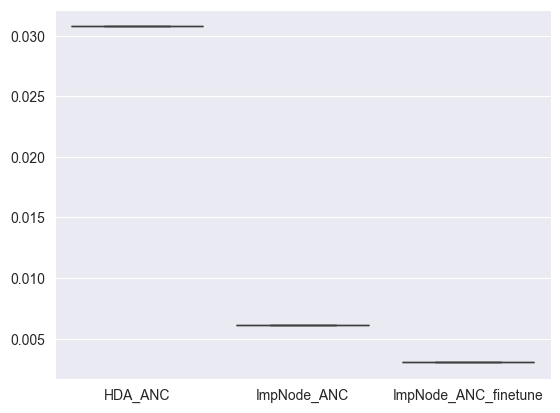

In [92]:
subdir = 'data/real/Cost'
file_name = 'Crime_degree.gml'
data_path = Path.cwd()/subdir

NUM_TEST_EPS = 1 # number of test episodes to run

hda_actions, hda_reward_history, hda_ep_score_history = hda('dw_nd', NUM_TEST_EPS, max_removed_nodes, data_path, file_name)

env_test = ImpnodeEnv(anc='dw_nd', ba_nodes=(30, 50), ba_edges=4,  seed=seed, render_option=False,mode='test', max_removed_nodes=max_removed_nodes,data_path=data_path, file_name=file_name)

# test the agent
actions, reward_history, ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test,
                                                        NUM_TEST_EPS = NUM_TEST_EPS,
                                                        results_basepath=RESULTS_BASEPATH_TEST1)
f_actions, f_reward_history, f_ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test_finetuned,
                                                        NUM_TEST_EPS = NUM_TEST_EPS,
                                                        results_basepath=RESULTS_BASEPATH_TEST1)



ep_score = {'HDA_ANC':hda_ep_score_history, 'ImpNode_ANC':ep_score_history, 'ImpNode_ANC_finetune':f_ep_score_history}
sns.boxplot(ep_score)
print(ep_score)

In [63]:
subdir = 'data/30-50'
data_path = Path.cwd()/subdir

NUM_TEST_EPS = 100 # number of test episodes to run

hda_actions_synthetic, hda_reward_history_synthetic, hda_ep_score_history_synthetic = hda('dw_nd', NUM_TEST_EPS, max_removed_nodes, data_path)

env_test_synthetic = ImpnodeEnv(anc='dw_nd', ba_nodes=(15, 25), ba_edges=4, max_removed_nodes=max_removed_nodes, seed=seed, render_option=False, data_path=data_path,mode='test')

# test the agent
actions_synthetic, reward_history_synthetic, ep_score_history_synthetic = test_loop(env=env_test_synthetic, agent=dqn_agent_test, NUM_TEST_EPS = NUM_TEST_EPS,                                                         results_basepath=RESULTS_BASEPATH_TEST1)


ep_score_synthetic = {'HDA_ANC':hda_ep_score_history_synthetic, 'ImpNode_ANC':ep_score_history_synthetic}
sns.boxplot(ep_score_synthetic)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\rituja_git\\ma-rituja-pardhi\\DQN\\data\\30-50/g_0'